In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import os

In [15]:
# Define start and end dates.
start_date = '2014-01-01'
end_date = '2015-01-01'
dates = pd.date_range(start_date,end_date)

# Building simple empty DataFrame with date indexing.
df1 = pd.DataFrame(index=dates)

# Read SPY data into temporary DataFrame
dfSPY = pd.read_csv('data/SPY.csv',index_col='Date', parse_dates=True,
                    usecols=['Date','Adj Close'], na_values='nan')

# Join both DataFrames
df1 = df1.join(dfSPY, how='inner')
print df1.head(10)

              Adj Close
2014-12-31  2058.899902
2014-12-30  2080.350098
2014-12-29  2090.570068
2014-12-26  2088.770020
2014-12-24  2081.879883
2014-12-23  2082.169922
2014-12-22  2078.540039
2014-12-19  2070.649902
2014-12-18  2061.229980
2014-12-17  2012.890015


In [16]:
# Drop NaN values from DataFrame (can be skipped if frames joined with 'inner' parameter)
#df1 = df1.dropna()

In [19]:
def symbol_to_path(symbol, base_dir='data'):
    """Return CSV file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col = "Date", parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp, how = 'inner')
        df.dropna()
    df = df.sort_index()
    return df

symbols = ['GOOG', 'IBM', 'AAPL']
    
# Get stock data
df = get_data(symbols, dates)

In [21]:
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # TODO: Your code here
    plot_data(df.ix[start_index:end_index,columns],title='Selected data')
    # Note: DO NOT modify anything else!
    
def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

# plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')

                 SPY      GOOG       IBM      AAPL
2014-01-02  1.000000  1.000000  1.000000  1.000000
2014-01-03  0.999667  0.992705  1.005983  0.978034
2014-01-06  0.997156  1.003773  1.002533  0.983367
2014-01-07  1.003221  1.023124  1.022530  0.976335
2014-01-08  1.003008  1.025253  1.013152  0.982518
2014-01-09  1.003357  1.015380  1.009971  0.969971
2014-01-10  1.005671  1.015326  1.009325  0.963499
2014-01-13  0.993024  1.008858  0.992616  0.968543
2014-01-14  1.003766  1.032593  1.002102  0.987815
2014-01-15  1.008952  1.031892  1.011912  1.007647
2014-01-16  1.007593  1.038720  1.017410  1.002025
2014-01-17  1.003668  1.033608  1.024578  0.977474
2014-01-21  1.006452  1.045440  1.015631  0.992660
2014-01-22  1.007031  1.046626  0.982321  0.997071
2014-01-23  0.998079  1.042206  0.984908  1.005514
2014-01-24  0.977243  1.009622  0.968253  0.987236
2014-01-27  0.972478  0.989318  0.958875  0.995245
2014-01-28  0.978450  1.008885  0.953215  0.915698
2014-01-29  0.968460  0.994430 

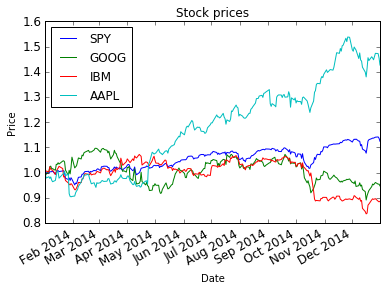

In [22]:
def normalize_data(dataframe):
    """ Normalize stock prices using first row of the dataframe"""
    return dataframe / dataframe.ix[0,:]

print normalize_data(df)
plot_data(normalize_data(df))